#__Mini Project 7: Exchange Vehicle Price Prediction__ 


#**1. Bike Price Prediction**

#Step 1: Import library

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import seaborn as sns

#Step 2: Import Data

In [ ]:
df=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bike%20Prices.csv')

In [ ]:
df

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0
...,...,...,...,...,...,...,...,...
1056,Royal,Royal Enfield Electra 5 S,90000,2012,Individual,1st owner,40000,NaN
1057,Hero,Hero Honda Hunk,20000,2010,Individual,1st owner,17000,NaN
1058,Bajaj,Bajaj Pulsar 220 DTS-i,60000,2014,Individual,1st owner,16000,NaN
1059,Hero,Hero Honda CBZ extreme,40000,2009,Individual,1st owner,50000,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1061 non-null   object 
 1   Model              1061 non-null   object 
 2   Selling_Price      1061 non-null   int64  
 3   Year               1061 non-null   int64  
 4   Seller_Type        1061 non-null   object 
 5   Owner              1061 non-null   object 
 6   KM_Driven          1061 non-null   int64  
 7   Ex_Showroom_Price  626 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 66.4+ KB


#Auxillary Step: Drop Missing Value Rows

In [ ]:
df=df.dropna()

In [ ]:
df.describe()

,Selling_Price,Year,KM_Driven,Ex_Showroom_Price
count,626.000000,626.000000,626.000000,6.260000e+02
mean,59445.164537,2014.800319,32671.576677,8.795871e+04
std,59904.350888,3.018885,45479.661039,7.749659e+04
min,6000.000000,2001.000000,380.000000,3.049000e+04
25%,30000.000000,2013.000000,13031.250000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,65000.000000,2017.000000,40000.000000,8.703150e+04
max,760000.000000,2020.000000,585659.000000,1.278000e+06


In [ ]:
df.shape

(626, 8)

In [ ]:
df.columns

Index(['Brand', 'Model', 'Selling_Price', 'Year', 'Seller_Type', 'Owner',
       'KM_Driven', 'Ex_Showroom_Price'],
      dtype='object')

#Auxillary Step: Fetching Categories and Counts of y

In [ ]:
df[['Brand']].value_counts()

Brand   
Honda       170
Bajaj       143
Hero        108
Yamaha       94
Royal        40
TVS          23
Suzuki       18
KTM           6
Mahindra      6
Kawasaki      4
UM            3
Activa        3
Harley        2
Vespa         2
BMW           1
Hyosung       1
Benelli       1
Yo            1
dtype: int64

In [ ]:
df[['Model']].value_counts()

Model                                     
Honda Activa [2000-2015]                      23
Honda CB Hornet 160R                          22
Bajaj Pulsar 180                              20
Yamaha FZ S V 2.0                             16
Bajaj Discover 125                            16
                                              ..
Royal Enfield Thunderbird 500                  1
Royal Enfield Continental GT [2013 - 2018]     1
Royal Enfield Classic Stealth Black            1
Royal Enfield Classic Squadron Blue            1
Yo Style                                       1
Length: 183, dtype: int64

In [ ]:
df[['Seller_Type']].value_counts()

Seller_Type
Individual     623
Dealer           3
dtype: int64

In [ ]:
df[['Owner']].value_counts()

Owner    
1st owner    556
2nd owner     66
3rd owner      3
4th owner      1
dtype: int64

#Auxillary Step: Encoding Categorical Features

In [ ]:
df.replace({'Seller_Type':{'Individual':0,'Dealer':1}},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
df.replace({'Owner':{'1st owner':0,'2nd owner':1,'3rd owner':2,'4th owner':3}},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


#Step 3. Define y and X

In [ ]:
y = df['Selling_Price']

In [ ]:
y.shape

(626,)

In [ ]:
y

0       30000
1       18000
2       20000
3       25000
4       24999
        ...  
621    330000
622    300000
623    425000
624    760000
625    750000
Name: Selling_Price, Length: 626, dtype: int64

In [ ]:
#X=df.drop(['Brand', 'Model', 'Selling_Price'],axis=1)
#or
X=df[['Year', 'Seller_Type', 'Owner','KM_Driven', 'Ex_Showroom_Price']]

In [ ]:
X.shape

(626, 5)

In [ ]:
X

,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,2017,0,0,8000,30490.0
1,2017,0,0,35000,32000.0
2,2011,0,0,10000,37675.0
3,2010,0,0,43000,42859.0
4,2012,0,1,35000,42859.0
...,...,...,...,...,...
621,2014,0,3,6500,534000.0
622,2011,0,0,12000,589000.0
623,2017,0,1,13600,599000.0
624,2019,0,0,2800,752020.0


#Step 4: Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=2529)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((438, 5), (188, 5), (438,), (188,))

#Step 5: Creating Model

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

#Step 6: Training Model

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

#Step 7: Predicting Model

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_pred.shape

(188,)

In [ ]:
y_pred

array([ 27210.52271465,  56340.08335163,  63471.94671996,  53627.63844785,
        55612.75744268,  53888.92259719,  33751.35275102,  60311.4950183 ,
       113713.05684467,  76639.49332954,  27826.7399381 ,  49919.83255841,
        65886.64311457,  26755.12664064,  48277.75426038, 127646.56079335,
        70047.10661635,  39350.67963653,  36081.03597878,  45360.79436339,
        48079.89470577,  44803.02464799,  55161.44026111,  71041.51821318,
        91689.22699159,  49301.53594645,  55988.19326252, 108171.54600296,
        32771.06897901,  25468.20072996,  17128.61806164, 179271.41130746,
        45698.99857622,  31371.09285079,  67886.52106737,  41492.49575815,
        56855.22238602,  47820.47003468,  74682.14053958,  24984.21822736,
        55374.00513699,  41412.36775222,  67991.60287764,  26553.59421844,
        89788.69870689,  45764.83633686, 133888.03770389, 106988.113825  ,
        71176.40667714,  25332.25485946,  79512.43778826,  63914.38088173,
        28632.12110986,  

#Step 8: Accuracy

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
mean_squared_error(y_test,y_pred)

554715615.5043668

In [ ]:
mean_absolute_error(y_test,y_pred)

12225.7370104107

In [ ]:
r2_score(y_test,y_pred)

0.8810414402984937

#__Data Visualisation__

<function matplotlib.pyplot.show>

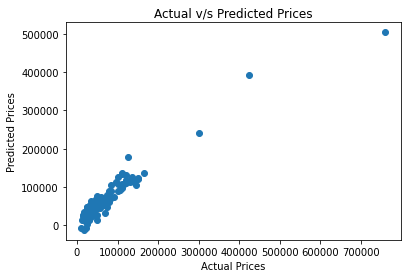

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual v/s Predicted Prices')
plt.show

#Step 10: Future Predictions Example

In [ ]:
df_new=df.sample(1)

In [ ]:
df_new

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
367,Yamaha,Yamaha FZ16,30000,2009,0,1,26000,78712.0


In [ ]:
X_new=df_new.drop(['Brand', 'Model', 'Selling_Price'],axis=1)

In [ ]:
X_new.shape

(1, 5)

In [ ]:
y_pred_new=model.predict(X_new)

In [ ]:
y_pred_new

array([21810.4089662])

#__2. Car Price Prediction__

#Step 1: Import library

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import seaborn as sns

#Step 2: Import Data

In [ ]:
df=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Car%20Price.csv')

In [ ]:
df

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...,...
4335,Hyundai,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          4340 non-null   object
 1   Model          4340 non-null   object
 2   Year           4340 non-null   int64 
 3   Selling_Price  4340 non-null   int64 
 4   KM_Driven      4340 non-null   int64 
 5   Fuel           4340 non-null   object
 6   Seller_Type    4340 non-null   object
 7   Transmission   4340 non-null   object
 8   Owner          4340 non-null   object
dtypes: int64(3), object(6)
memory usage: 305.3+ KB


In [ ]:
df.describe()

,Year,Selling_Price,KM_Driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
df.shape

(4340, 9)

In [ ]:
df.columns

Index(['Brand', 'Model', 'Year', 'Selling_Price', 'KM_Driven', 'Fuel',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

#Auxillary Step: Fetching Categories and Counts of y

In [ ]:
df[['Brand']].value_counts()

Brand        
Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Mitsubishi          6
Jaguar              6
Land                5
Ambassador          4
Volvo               4
Jeep                3
OpelCorsa           2
MG                  2
Isuzu               1
Force               1
Daewoo              1
Kia                 1
dtype: int64

In [ ]:
df[['Model']].value_counts()

Model                               
Maruti Swift Dzire VDI                  69
Maruti Alto 800 LXI                     59
Maruti Alto LXi                         47
Hyundai EON Era Plus                    35
Maruti Alto LX                          35
                                        ..
Mahindra KUV 100 G80 K4 Plus             1
Mahindra KUV 100 mFALCON D75 K8          1
Mahindra KUV 100 mFALCON D75 K8 AW       1
Mahindra KUV 100 mFALCON G80 K2 Plus     1
Volvo XC60 D5 Inscription                1
Length: 1491, dtype: int64

In [ ]:
df[['Fuel']].value_counts()

Fuel    
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
dtype: int64

In [ ]:
df[['Seller_Type']].value_counts()

Seller_Type     
Individual          3244
Dealer               994
Trustmark Dealer     102
dtype: int64

In [ ]:
df[['Transmission']].value_counts()

Transmission
Manual          3892
Automatic        448
dtype: int64

In [ ]:
df[['Owner']].value_counts()

Owner               
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
dtype: int64

#Auxillary Step: Encoding Categorical Features

In [ ]:
df.replace({'Fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)

In [ ]:
df.replace({'Seller_Type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)

In [ ]:
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
df.replace({'Owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)

#Step 3. Define y and X

In [ ]:
y = df['Selling_Price']

In [ ]:
y.shape

(4340,)

In [ ]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: Selling_Price, Length: 4340, dtype: int64

In [ ]:
#X=df.drop(['Brand', 'Model', 'Selling_Price'],axis=1)
#or
X=df[['Year', 'KM_Driven','Fuel', 'Seller_Type','Transmission', 'Owner']]

In [ ]:
X.shape

(4340, 6)

In [ ]:
X

,Year,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,2007,70000,0,0,0,0
1,2007,50000,0,0,0,0
2,2012,100000,1,0,0,0
3,2017,46000,0,0,0,0
4,2014,141000,1,0,0,1
...,...,...,...,...,...,...
4335,2014,80000,1,0,0,1
4336,2014,80000,1,0,0,1
4337,2009,83000,0,0,0,1
4338,2016,90000,1,0,0,0


#Step 4: Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=2529)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3038, 6), (1302, 6), (3038,), (1302,))

#Step 5: Creating Model

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

#Step 6: Training Model

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

#Step 7: Predicting Model

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_pred.shape

(1302,)

In [ ]:
y_pred

array([502458.82786413, 646333.17428704, 521962.74075836, ...,
       620183.32683781, 315403.8278857 , 731862.54196037])

#Step 8: Accuracy

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
mean_squared_error(y_test,y_pred)

193242972302.19553

In [ ]:
mean_absolute_error(y_test,y_pred)

228808.95522977872

In [ ]:
r2_score(y_test,y_pred)

0.4075563394370839

#__Data Visualisation__

<function matplotlib.pyplot.show>

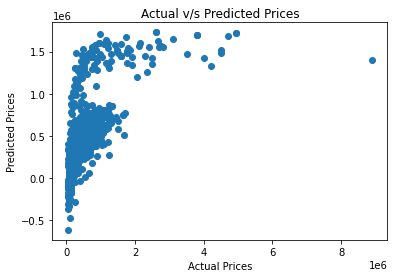

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual v/s Predicted Prices')
plt.show

#__Future Predictions Example__

In [ ]:
df_new=df.sample(1)

In [ ]:
df_new

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
306,Mahindra,Mahindra Bolero Power Plus Plus AC BSIV PS,2015,430000,200000,1,0,0,0


In [ ]:
X_new=df_new.drop(['Brand', 'Model', 'Selling_Price'],axis=1)

In [ ]:
X_new.shape

(1, 6)

In [ ]:
y_pred_new=model.predict(X_new)

In [ ]:
y_pred_new

array([481052.59195395])

#Link for the same: https://colab.research.google.com/drive/1Ict9DHDz1BwNsTbQrk1aHJU3ki1x1cIN?usp=sharing